In [1]:
#-----------------------------------------------------------------------------------------------------------------
"IMPORT LIBRARIES"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor


In [2]:
"DATASET LOADING"

df = pd.read_csv("2019.csv")

df['Date'] = pd.to_datetime(df['Date'])

model_work = "RF"
###Replacing the Missing Values

# df = df.sort_values(by='Date',ascending=True)

df.set_index("Date", inplace=True)

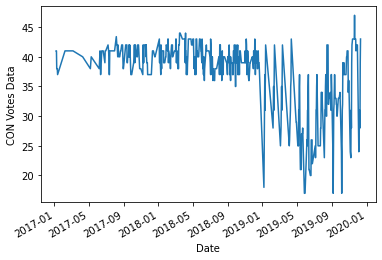

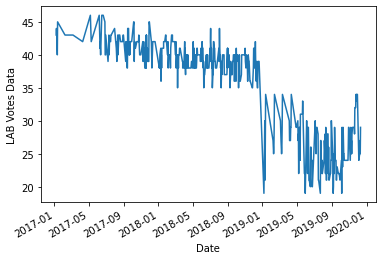

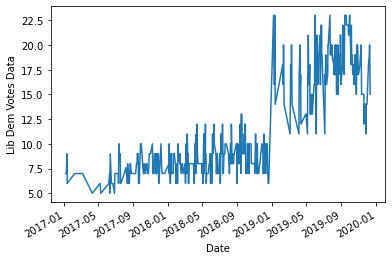

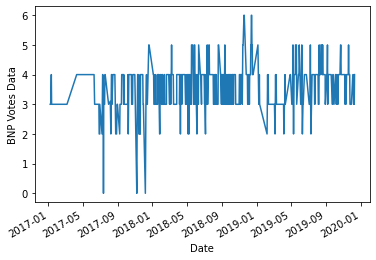

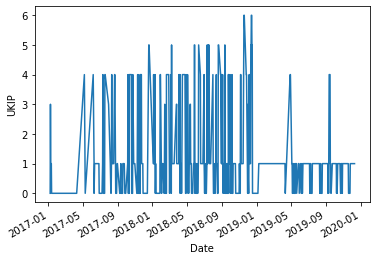

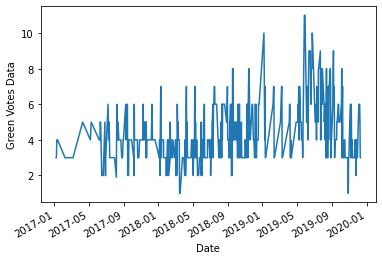

In [3]:
"EDA (Exploratory Data Analysis)"

df['Con'].plot()
plt.ylabel("CON Votes Data")
plt.show()

df['Lab'].plot()
plt.ylabel("LAB Votes Data")
plt.show()

df['Lib Dem'].plot()
plt.ylabel("Lib Dem Votes Data")
plt.show()

df['SNP'].plot()
plt.ylabel("BNP Votes Data")
plt.show()

df['Plaid Cymru'].plot()
plt.ylabel("UKIP")
plt.show()

df['Green'].plot()
plt.ylabel("Green Votes Data")
plt.show()



Mean Absolute Error Con: 0.2733
Mean Squared Error Con: 0.2715
Root Mean Squared Error Con: 0.5211
(R^2) Score Con: 0.8905
Accuracy Con: Con    99.39
dtype: float64



<ipython-input-4-bc3dac59506c>:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(df_Z_train, df_Z_train)


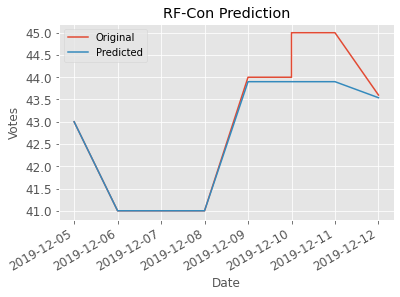

In [4]:
"PREDICTION FOR ONE WEEK"

"One Week Prediction"

df_Z_train = df

# Slice the Data
df_Z_test = pd.read_excel("2019_test.xlsx")

df_Z_test['Date'] = pd.to_datetime(df_Z_test['Date'])

df_Z_test.set_index("Date", inplace=True)



#--------------------------------  CON   ------------------------------------------------------------------------------------
"MODEL PREDICTION"

party = "Con"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))

errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()

#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()



<ipython-input-5-4579bf51aacb>:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(df_Z_train, df_Z_train)


Mean Absolute Error Lab: 0.0556
Mean Squared Error Lab: 0.01
Root Mean Squared Error Lab: 0.1
(R^2) Score Lab: 0.9866
Accuracy Lab: Lab    99.83
dtype: float64



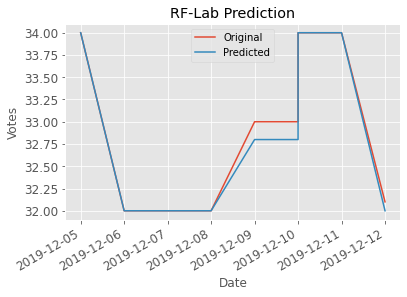

In [5]:
"MODEL PREDICTION"


"One Week Prediction"

df_Z_train = df

# Slice the Data
df_Z_test = pd.read_excel("2019_test.xlsx")

df_Z_test['Date'] = pd.to_datetime(df_Z_test['Date'])

df_Z_test.set_index("Date", inplace=True)


party = "Lab"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()

#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()

<ipython-input-6-edcf78a91beb>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(df_Z_train, df_Z_train)


Mean Absolute Error Lib Dem: 0.0444
Mean Squared Error Lib Dem: 0.0178
Root Mean Squared Error Lib Dem: 0.1333
(R^2) Score Lib Dem: 0.9947
Accuracy Lib Dem: Lib Dem    99.62
dtype: float64



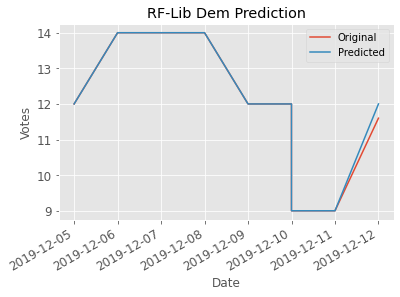

In [6]:
"MODEL PREDICTION"


"One Week Prediction"
df_Z_train = df

# Slice the Data
df_Z_test = pd.read_excel("2019_test.xlsx")

df_Z_test['Date'] = pd.to_datetime(df_Z_test['Date'])

df_Z_test.set_index("Date", inplace=True)


party = "Lib Dem"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()
#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()



Mean Absolute Error SNP: 0.0111
Mean Squared Error SNP: 0.0011
Root Mean Squared Error SNP: 0.0333
(R^2) Score SNP: 0.9997
Accuracy SNP: SNP    99.36
dtype: float64



<ipython-input-7-c5d176545d18>:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(df_Z_train, df_Z_train)


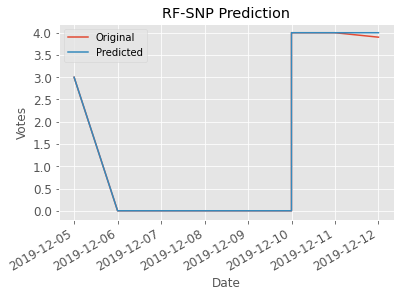

In [7]:
"MODEL PREDICTION"


"One Week Prediction"
df_Z_train = df

# Slice the Data
df_Z_test = pd.read_excel("2019_test.xlsx")

df_Z_test['Date'] = pd.to_datetime(df_Z_test['Date'])

df_Z_test.set_index("Date", inplace=True)


party = "SNP"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()
#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()



Mean Absolute Error Plaid Cymru: 0.0556
Mean Squared Error Plaid Cymru: 0.0278
Root Mean Squared Error Plaid Cymru: 0.1667
(R^2) Score Plaid Cymru: 0.8393
Accuracy Plaid Cymru: Plaid Cymru    66.67
dtype: float64



<ipython-input-8-9d1dbc17f86e>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(df_Z_train, df_Z_train)


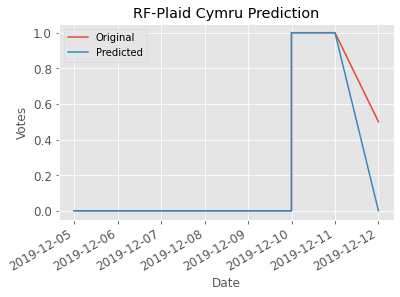

In [8]:
"MODEL PREDICTION"


"One Week Prediction"
df_Z_train = df

# Slice the Data
df_Z_test = pd.read_excel("2019_test.xlsx")

df_Z_test['Date'] = pd.to_datetime(df_Z_test['Date'])

df_Z_test.set_index("Date", inplace=True)

party = "Plaid Cymru"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()
#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()

Mean Absolute Error Green: 0.0333
Mean Squared Error Green: 0.01
Root Mean Squared Error Green: 0.1
(R^2) Score Green: -0.125
Accuracy Green: Green    98.77
dtype: float64



<ipython-input-9-8aba350836f6>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(df_Z_train, df_Z_train)


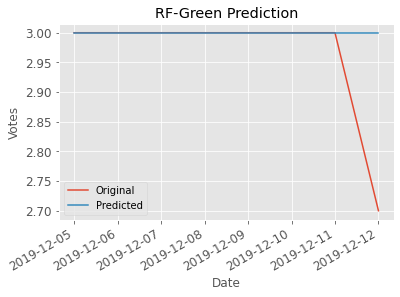

In [9]:
"MODEL PREDICTION"


"One Week Prediction"
df_Z_train = df

# Slice the Data
df_Z_test = pd.read_excel("2019_test.xlsx")

df_Z_test['Date'] = pd.to_datetime(df_Z_test['Date'])

df_Z_test.set_index("Date", inplace=True)

party = "Green"

df_Z_train = df_Z_train[[party]]
df_Z_test = df_Z_test[[party]]


regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(df_Z_train, df_Z_train)  

y_preds = regressor.predict(df_Z_test)

#-----------------------------------------------------------------------------------------------------------------
"PERFORMANCE METRICS"

print(f"Mean Absolute Error {party}:", round(metrics.mean_absolute_error(df_Z_test, y_preds), 4))
print(f"Mean Squared Error {party}:", round(metrics.mean_squared_error(df_Z_test, y_preds), 4))
print(f"Root Mean Squared Error {party}:", round(np.sqrt(metrics.mean_squared_error(df_Z_test, y_preds)), 4))
print(f"(R^2) Score {party}:", round(metrics.r2_score(df_Z_test, y_preds), 4))
errors = abs(df_Z_test.values.reshape(-1,1)- y_preds.reshape(-1,1))
mape = 100 * (errors / df_Z_test)
accuracy = 100 - np.mean(mape)
print(f'Accuracy {party}:', round(accuracy, 2)) 
print()
#-----------------------------------------------------------------------------------------------------------------
"PREDICTION PLOT"

dataset_kk = pd.DataFrame({'y_test': [df_Z_test[party].values.reshape(-1,1)], 'y_preds': [y_preds.reshape(-1,1)]})


x = df_Z_test[party].values
y = y_preds
dfedf = pd.DataFrame({'Original':x, 'Predicted':y , "Date":df_Z_test.index.values})
dfedf.set_index("Date", inplace=True)
plt.style.use('ggplot')
ax = dfedf[['Original','Predicted']].plot(kind='line', title =f"{model_work}-{party} Prediction",legend=True, fontsize=12)
ax.set_xlabel("Date",fontsize=12)
ax.set_ylabel("Votes",fontsize=12)
plt.show()